In [1]:
from zenml.environment import Environment


# ZENML SETUP


In [2]:
!rm -rf .zen
!zenml init

⠋ Initializing ZenML repository at 
c:\Users\Pc\Desktop\Taha\Projects-Of-Data-Science\MLOPS PROJECT.

⠙ Initializing ZenML repository at 
c:\Users\Pc\Desktop\Taha\Projects-Of-Data-Science\MLOPS PROJECT.

⠹ Initializing ZenML repository at 
c:\Users\Pc\Desktop\Taha\Projects-Of-Data-Science\MLOPS PROJECT.

⠼ Initializing ZenML repository at 
c:\Users\Pc\Desktop\Taha\Projects-Of-Data-Science\MLOPS PROJECT.
Setting the repo active workspace to 'default'.
Setting the repo active stack to default.

ZenML repository initialized at 
c:\Users\Pc\Desktop\Taha\Projects-Of-Data-Science\MLOPS PROJECT.
⠴ Initializing ZenML repository at 
c:\Users\Pc\Desktop\Taha\Projects-Of-Data-Science\MLOPS PROJECT.

⠴ Initializing ZenML repository at 
c:\Users\Pc\Desktop\Taha\Projects-Of-Data-Science\MLOPS PROJECT.


The local active stack was initialized to 'default'. This local configuration 
will only take effect when you're running ZenML from the initialized repository
root, or from a subdirectory. For more i

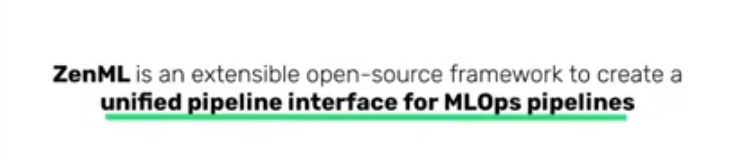

# EXPERIMENTATION ML CODE
***It is only for example, the proper version of zenml is way more complex***

# Purpose of ClassifierMixin


The ClassifierMixin class ensures that any classifier algorithm in scikit-learn adheres to a common interface, which includes methods for fitting the model to the data, making predictions, and evaluating the model's performance. This standardization allows users to easily switch between different classifier algorithms without having to change their code significantly.

#### BASIC INTUITION OF ML FLOW

In [3]:
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [4]:
def train_test() -> None:
    digits = load_digits()
    data = digits.images.reshape(len(digits.images),-1)
    X_train,X_test,y_train,y_test = train_test_split(
        data,digits.target,test_size=0.2, shuffle = False
    )
    model = SVC(gamma=0.001)
    model.fit(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    print(f"Test accuracy: {test_acc}")

In [5]:
train_test()


Test accuracy: 0.9583333333333334


# ZENML PIPELINE

***A dummy example***

In [6]:
from zenml import step
from typing_extensions import Annotated
import pandas as pd
from typing import Tuple
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

@step
# This is use for preparing data 
def importer() -> Tuple[
    Annotated[np.ndarray,"X_train"],
    Annotated[np.ndarray,"X_test"],
    Annotated[np.ndarray,"y_train"],
    Annotated[np.ndarray,"y_test"],
]:
    digits = load_digits()
    data = digits.images.reshape(len(digits.images),-1)
    X_train,X_test,y_train,y_test = train_test_split(
        data,digits.target,test_size=0.2,shuffle=False
    )
    return X_train,X_test,y_train,y_test

@step
#Now model Training Class
def svc_trainer(
    X_train:np.ndarray,
    y_train:np.ndarray,
) -> ClassifierMixin:
    "Train an Sklearn SVC classifier"
    model = SVC(gamma=0.001)
    model.fit(X_train,y_train)
    return model

@step
#Now the evaluator Class
def evaluator(
    X_test:np.ndarray,
    y_test:np.ndarray,
    model: ClassifierMixin,
) -> float:
    test_acc = model.score(X_test,y_test)
    print(f"the test acc is {test_acc}")
    return test_acc


In [7]:
from zenml import pipeline

@pipeline

def digits_pipeline():
    X_train,X_test,y_train,y_test = importer()
    model = svc_trainer(X_train = X_train , y_train = y_train)
    evaluator(X_test = X_test , y_test = y_test,model = model)

# RUNNING ZENML PIPELINE

In [8]:
if __name__ == "__main__":
    # Run the pipeline
    pipeline_response = digits_pipeline()




Initiating a new run for the pipeline: digits_pipeline.
Reusing registered pipeline version: (version: 2).
Executing a new run.
Using user: default
Using stack: default
  orchestrator: default
  artifact_store: default
You can visualize your pipeline runs in the ZenML Dashboard. In order to try it locally, please run zenml up.
Using cached version of importer.
Step importer has started.
Using cached version of svc_trainer.
Step svc_trainer has started.
Using cached version of evaluator.
Step evaluator has started.
Pipeline run has finished in 1.626s.
